In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
import nltk

from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.preprocessing  import StandardScaler
from sklearn.metrics import confusion_matrix, matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.datasets import load_digits
digits=load_digits()
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
digits.data[:5]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [5]:
dataset=pd.DataFrame(digits.data)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [6]:
dataset = pd.read_csv( "Seq_w1.csv")
#dataset2= pd.read_csv( "Sequence_wm.csv")
print(dataset)

   MCC  1  2  3  4  5  6  7  8  9  ...  35  36  37  38  39  40  41  42  43  44
0    A  0  0  0  0  0  0  1  0  1  ...   0   0   0   1   0   0   0   0   1   1
1    C  0  1  0  1  0  0  1  0  0  ...   0   0   0   0   0   0   1   1   0   1
2    D  0  0  0  1  0  0  1  1  0  ...   0   0   0   0   1   0   1   0   0   1
3    E  1  0  1  0  0  0  0  1  1  ...   1   0   0   0   0   1   1   0   1   1
4    F  0  0  1  1  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   1   0
..  .. .. .. .. .. .. .. .. .. ..  ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
75   S  1  1  0  1  0  1  0  0  1  ...   1   1   0   1   1   1   1   0   1   0
76   T  1  0  0  0  0  0  1  0  0  ...   0   1   0   0   0   0   0   0   0   0
77   V  0  1  0  0  0  0  0  0  0  ...   0   0   1   0   1   1   0   0   1   0
78   W  1  0  0  1  0  0  0  0  0  ...   0   0   0   0   1   0   0   0   1   0
79   Y  1  0  1  0  0  1  0  1  0  ...   1   0   1   0   0   0   1   1   0   0

[80 rows x 45 columns]


In [7]:
dataset.isna().sum()

MCC    0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
dtype: int64

In [8]:
dataset.shape

(80, 45)

In [9]:
dataset.isnull().any()

MCC    False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
dtype: bool

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 45 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   MCC     80 non-null     object
 1   1       80 non-null     int64 
 2   2       80 non-null     int64 
 3   3       80 non-null     int64 
 4   4       80 non-null     int64 
 5   5       80 non-null     int64 
 6   6       80 non-null     int64 
 7   7       80 non-null     int64 
 8   8       80 non-null     int64 
 9   9       80 non-null     int64 
 10  10      80 non-null     int64 
 11  11      80 non-null     int64 
 12  12      80 non-null     int64 
 13  13      80 non-null     int64 
 14  14      80 non-null     int64 
 15  15      80 non-null     int64 
 16  16      80 non-null     int64 
 17  17      80 non-null     int64 
 18  18      80 non-null     int64 
 19  19      80 non-null     int64 
 20  20      80 non-null     int64 
 21  21      80 non-null     int64 
 22  22      80 non-null     int6

In [11]:
dataset.nunique()

MCC    20
1       2
2       2
3       2
4       2
5       2
6       2
7       2
8       2
9       2
10      2
11      2
12      2
13      2
14      2
15      2
16      2
17      2
18      2
19      2
20      2
21      2
22      2
23      2
24      2
25      2
26      2
27      2
28      2
29      2
30      2
31      2
32      2
33      2
34      2
35      2
36      2
37      2
38      2
39      2
40      2
41      2
42      2
43      2
44      2
dtype: int64

In [12]:
dataset.head(10)

,MCC,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,A,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,1
1,C,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,1
2,D,0,0,0,1,0,0,1,1,0,...,0,0,0,0,1,0,1,0,0,1
3,E,1,0,1,0,0,0,0,1,1,...,1,0,0,0,0,1,1,0,1,1
4,F,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,G,1,0,1,0,1,1,1,1,1,...,0,0,0,1,0,0,0,1,0,0
6,H,1,0,1,1,0,1,1,1,0,...,0,0,0,0,0,1,0,0,0,1
7,I,0,1,0,1,0,1,0,0,0,...,0,1,0,1,1,0,1,1,0,0
8,K,1,0,0,1,1,0,0,0,0,...,0,0,0,1,0,1,0,0,1,1
9,L,1,1,1,1,0,0,0,1,1,...,0,1,0,0,0,1,0,0,1,1


In [13]:
dataset.dtypes

MCC    object
1       int64
2       int64
3       int64
4       int64
5       int64
6       int64
7       int64
8       int64
9       int64
10      int64
11      int64
12      int64
13      int64
14      int64
15      int64
16      int64
17      int64
18      int64
19      int64
20      int64
21      int64
22      int64
23      int64
24      int64
25      int64
26      int64
27      int64
28      int64
29      int64
30      int64
31      int64
32      int64
33      int64
34      int64
35      int64
36      int64
37      int64
38      int64
39      int64
40      int64
41      int64
42      int64
43      int64
44      int64
dtype: object

In [14]:
dataset.shape

(80, 45)

In [15]:
dataset.columns

Index(['MCC', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44'],
      dtype='object')

In [16]:
dataset=dataset.dropna(axis=1)

In [17]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
1,80.0,0.5750,0.497462,0.0,0.0,1.0,1.00,1.0
2,80.0,0.4750,0.502525,0.0,0.0,0.0,1.00,1.0
3,80.0,0.3625,0.483755,0.0,0.0,0.0,1.00,1.0
4,80.0,0.6125,0.490253,0.0,0.0,1.0,1.00,1.0
5,80.0,0.2750,0.449331,0.0,0.0,0.0,1.00,1.0
6,80.0,0.3875,0.490253,0.0,0.0,0.0,1.00,1.0
7,80.0,0.4750,0.502525,0.0,0.0,0.0,1.00,1.0
8,80.0,0.3500,0.479979,0.0,0.0,0.0,1.00,1.0
9,80.0,0.4125,0.495390,0.0,0.0,0.0,1.00,1.0
10,80.0,0.3125,0.466437,0.0,0.0,0.0,1.00,1.0


In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 45 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   MCC     80 non-null     object
 1   1       80 non-null     int64 
 2   2       80 non-null     int64 
 3   3       80 non-null     int64 
 4   4       80 non-null     int64 
 5   5       80 non-null     int64 
 6   6       80 non-null     int64 
 7   7       80 non-null     int64 
 8   8       80 non-null     int64 
 9   9       80 non-null     int64 
 10  10      80 non-null     int64 
 11  11      80 non-null     int64 
 12  12      80 non-null     int64 
 13  13      80 non-null     int64 
 14  14      80 non-null     int64 
 15  15      80 non-null     int64 
 16  16      80 non-null     int64 
 17  17      80 non-null     int64 
 18  18      80 non-null     int64 
 19  19      80 non-null     int64 
 20  20      80 non-null     int64 
 21  21      80 non-null     int64 
 22  22      80 non-null     int6

In [19]:
dataset.columns

Index(['MCC', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44'],
      dtype='object')

In [20]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y=LabelEncoder()
dataset.iloc[:,1]=labelencoder_Y.fit_transform(dataset.iloc[:,1].values)
dataset.iloc[:,1]

0     0
1     0
2     0
3     1
4     0
     ..
75    1
76    1
77    0
78    1
79    1
Name: 1, Length: 80, dtype: int64

In [21]:
for i in dataset.columns:
    print("---------------------")
    print(i)
    print("---------------------")
    print(dataset[i].value_counts())

---------------------
MCC
---------------------
A    4
C    4
W    4
V    4
T    4
S    4
R    4
Q    4
P    4
N    4
M    4
L    4
K    4
I    4
H    4
G    4
F    4
E    4
D    4
Y    4
Name: MCC, dtype: int64
---------------------
1
---------------------
1    46
0    34
Name: 1, dtype: int64
---------------------
2
---------------------
0    42
1    38
Name: 2, dtype: int64
---------------------
3
---------------------
0    51
1    29
Name: 3, dtype: int64
---------------------
4
---------------------
1    49
0    31
Name: 4, dtype: int64
---------------------
5
---------------------
0    58
1    22
Name: 5, dtype: int64
---------------------
6
---------------------
0    49
1    31
Name: 6, dtype: int64
---------------------
7
---------------------
0    42
1    38
Name: 7, dtype: int64
---------------------
8
---------------------
0    52
1    28
Name: 8, dtype: int64
---------------------
9
---------------------
0    47
1    33
Name: 9, dtype: int64
---------------------
10
-------

In [22]:
sns.pairplot(dataset)

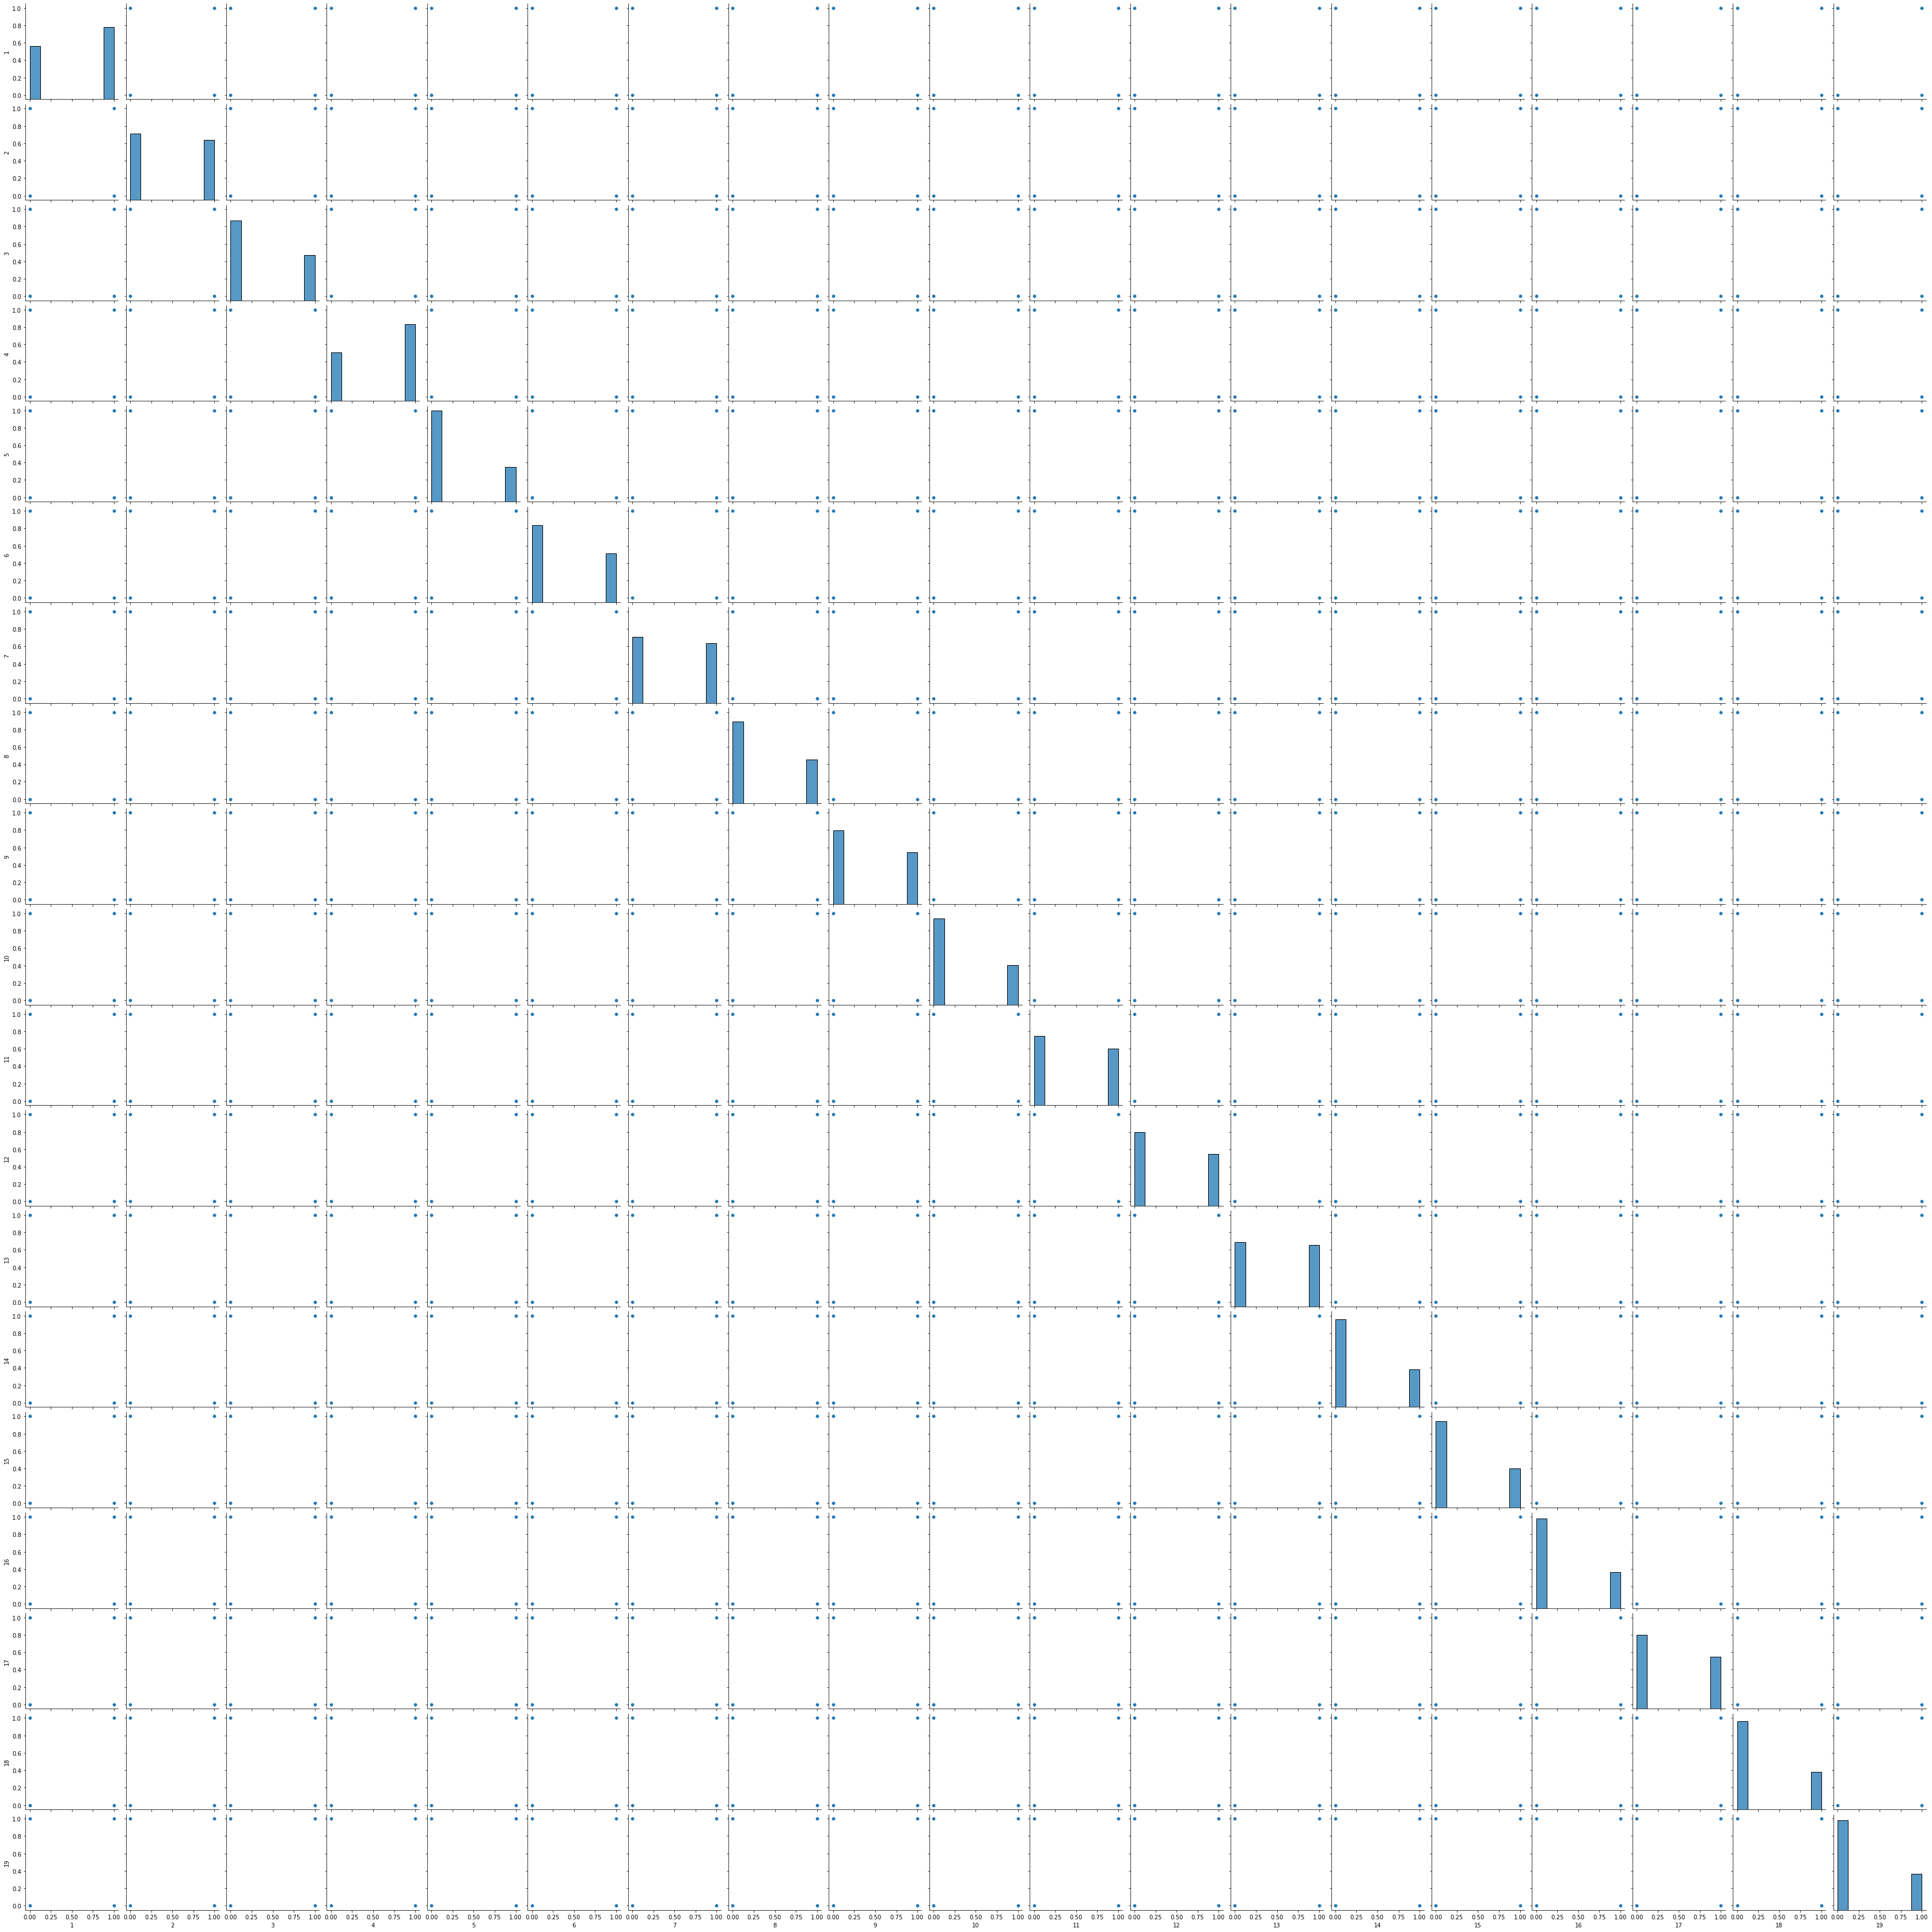

In [23]:
sns.pairplot(dataset.iloc[:,1:20])

In [24]:
dataset.iloc[:,1:44].corr()

,1,2,3,4,5,6,7,8,9,10,...,34,35,36,37,38,39,40,41,42,43
1,1.000000e+00,0.058231,0.069695,-0.216695,0.076450,0.112889,-0.043040,3.127829e-01,0.309473,-0.020457,...,0.138198,0.056686,0.164660,0.088649,-0.036809,-0.075011,0.227621,-0.115377,8.258401e-02,0.269383
2,5.823083e-02,1.000000,-0.196565,0.088631,-0.361583,-0.088631,-0.102757,-1.574396e-02,0.067373,0.330772,...,-0.380295,0.088181,0.248509,0.384775,0.030833,0.060754,0.194947,0.171949,2.452557e-01,0.095598
3,6.969529e-02,-0.196565,1.000000,0.119424,0.001456,0.147445,-0.248635,4.824680e-01,0.213262,-0.227902,...,-0.073665,-0.079111,0.031922,-0.284001,-0.056779,-0.284001,0.088105,0.134943,-8.492397e-02,-0.211682
4,-2.166952e-01,0.088631,0.119424,1.000000,-0.084757,0.158657,-0.065510,9.951811e-02,-0.063196,0.204123,...,0.017368,0.004109,0.058889,-0.238720,0.145093,0.204123,0.009083,0.223211,-8.379835e-02,-0.105727
5,7.645045e-02,-0.361583,0.001456,-0.084757,1.000000,0.199683,0.199011,1.760780e-02,0.166335,-0.052847,...,0.439353,0.170344,-0.068735,-0.173641,0.247649,-0.052847,-0.189710,-0.122121,2.971477e-01,-0.106915
6,1.128891e-01,-0.088631,0.147445,0.158657,0.199683,1.000000,0.065510,1.156562e-01,0.167436,0.183365,...,0.291396,0.379356,-0.004109,0.017299,0.142220,0.128009,-0.009083,0.085553,1.885463e-01,-0.255293
7,-4.304018e-02,-0.102757,-0.248635,-0.065510,0.199011,0.065510,1.000000,3.673592e-02,-0.085169,0.222765,...,0.071541,0.034738,-0.392805,0.222765,0.030833,-0.101257,-0.210137,-0.179479,2.452557e-01,-0.256606
8,3.127829e-01,-0.015744,0.482468,0.099518,0.017608,0.115656,0.036736,1.000000e+00,0.396606,-0.042405,...,-0.155059,-0.005595,-0.005595,-0.042405,-0.217163,0.014135,0.058315,0.160315,9.629111e-02,-0.189642
9,3.094730e-01,0.067373,0.213262,-0.063196,0.166335,0.167436,-0.085169,3.966064e-01,1.000000,-0.017119,...,0.139413,0.177546,0.123334,-0.071901,0.166335,0.037662,0.152810,-0.115223,4.146469e-02,0.211814
10,-2.045745e-02,0.330772,-0.227902,0.204123,-0.052847,0.183365,0.222765,-4.240521e-02,-0.017119,1.000000,...,-0.192690,0.165536,-0.122353,0.243636,-0.173641,0.010909,-0.306862,-0.030425,3.853373e-01,-0.067760


<AxesSubplot:>

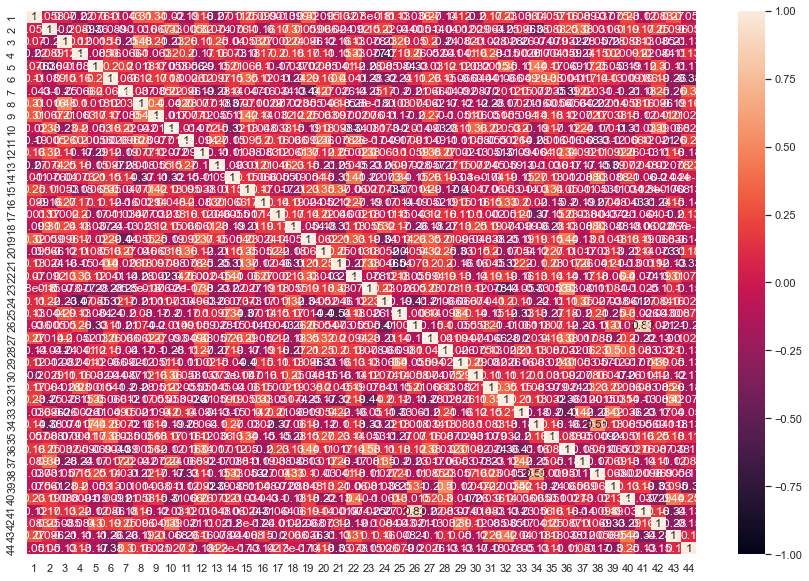

In [25]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data = dataset.corr(), annot=True, vmin=-1, vmax=1)

<AxesSubplot:>

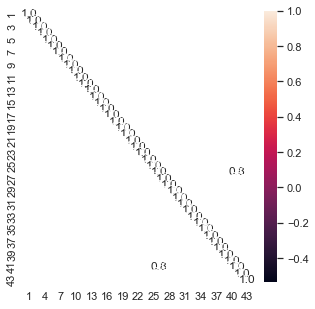

In [26]:
plt.figure(figsize=(5,5))
sns.heatmap(dataset.iloc[:,1:44].corr(),annot=True,fmt=".1f",linewidth=10)

<AxesSubplot:>

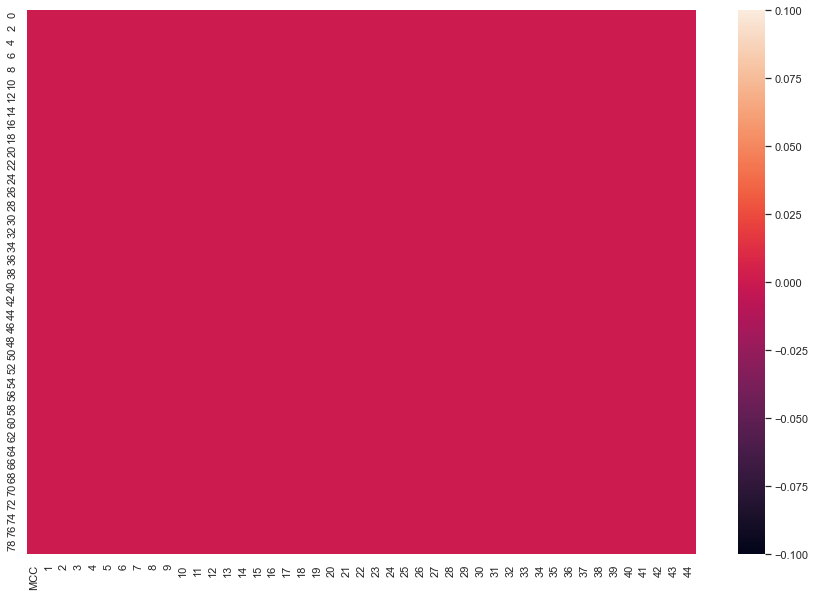

In [27]:
sns.heatmap(dataset.isnull())

In [28]:
dataset=dataset.dropna()

In [29]:
dataset.head()

,MCC,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,A,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,1
1,C,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,1
2,D,0,0,0,1,0,0,1,1,0,...,0,0,0,0,1,0,1,0,0,1
3,E,1,0,1,0,0,0,0,1,1,...,1,0,0,0,0,1,1,0,1,1
4,F,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [30]:
pd.options.display.float_format = '{:,.4f}'.format
corr_matrix=dataset.corr()
corr_matrix

,1,2,3,4,5,6,7,8,9,10,...,35,36,37,38,39,40,41,42,43,44
1,1.0000,0.0582,0.0697,-0.2167,0.0765,0.1129,-0.0430,0.3128,0.3095,-0.0205,...,0.0567,0.1647,0.0886,-0.0368,-0.0750,0.2276,-0.1154,0.0826,0.2694,-0.0506
2,0.0582,1.0000,-0.1966,0.0886,-0.3616,-0.0886,-0.1028,-0.0157,0.0674,0.3308,...,0.0882,0.2485,0.3848,0.0308,0.0608,0.1949,0.1719,0.2453,0.0956,0.0501
3,0.0697,-0.1966,1.0000,0.1194,0.0015,0.1474,-0.2486,0.4825,0.2133,-0.2279,...,-0.0791,0.0319,-0.2840,-0.0568,-0.2840,0.0881,0.1349,-0.0849,-0.2117,-0.1300
4,-0.2167,0.0886,0.1194,1.0000,-0.0848,0.1587,-0.0655,0.0995,-0.0632,0.2041,...,0.0041,0.0589,-0.2387,0.1451,0.2041,0.0091,0.2232,-0.0838,-0.1057,0.1283
5,0.0765,-0.3616,0.0015,-0.0848,1.0000,0.1997,0.1990,0.0176,0.1663,-0.0528,...,0.1703,-0.0687,-0.1736,0.2476,-0.0528,-0.1897,-0.1221,0.2971,-0.1069,-0.1680
6,0.1129,-0.0886,0.1474,0.1587,0.1997,1.0000,0.0655,0.1157,0.1674,0.1834,...,0.3794,-0.0041,0.0173,0.1422,0.1280,-0.0091,0.0856,0.1885,-0.2553,-0.3849
7,-0.0430,-0.1028,-0.2486,-0.0655,0.1990,0.0655,1.0000,0.0367,-0.0852,0.2228,...,0.0347,-0.3928,0.2228,0.0308,-0.1013,-0.2101,-0.1795,0.2453,-0.2566,0.3004
8,0.3128,-0.0157,0.4825,0.0995,0.0176,0.1157,0.0367,1.0000,0.3966,-0.0424,...,-0.0056,-0.0056,-0.0424,-0.2172,0.0141,0.0583,0.1603,0.0963,-0.1896,0.1572
9,0.3095,0.0674,0.2133,-0.0632,0.1663,0.1674,-0.0852,0.3966,1.0000,-0.0171,...,0.1775,0.1233,-0.0719,0.1663,0.0377,0.1528,-0.1152,0.0415,0.2118,0.0254
10,-0.0205,0.3308,-0.2279,0.2041,-0.0528,0.1834,0.2228,-0.0424,-0.0171,1.0000,...,0.1655,-0.1224,0.2436,-0.1736,0.0109,-0.3069,-0.0304,0.3853,-0.0678,0.0270


In [31]:
X=dataset.iloc[:,1:10].values
y=dataset.iloc[:,-1].values


In [32]:
X

array([[0, 0, 0, 0, 0, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 1, 1, 0],
       [1, 0, 1, 0, 0, 0, 0, 1, 1],
       [0, 0, 1, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 1, 1, 1, 1],
       [1, 0, 1, 1, 0, 1, 1, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 0, 0],
       [1, 0, 0, 1, 1, 0, 0, 0, 0],
       [1, 1, 1, 1, 0, 0, 0, 1, 1],
       [1, 1, 1, 1, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 1, 0, 1, 1, 0, 0],
       [1, 1, 0, 0, 0, 1, 1, 1, 1],
       [1, 1, 0, 0, 0, 0, 1, 0, 0],
       [1, 1, 0, 1, 0, 1, 0, 0, 1],
       [0, 1, 1, 1, 1, 0, 0, 1, 1],
       [0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 1, 1, 0],
       [1, 0, 1, 0, 0, 0, 0, 1, 1],
       [0, 0, 1, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 1, 1, 1, 1],
       [1, 0, 1, 1, 0, 1, 1, 1, 0],
       [0, 1, 0, 1, 0, 1, 0,

In [33]:
y

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.20,random_state=0)  


In [76]:
X_train.shape,y_train.shape

((64, 9), (64,))

In [77]:
X_test.shape, y_test.shape

((16, 9), (16,))

In [78]:
from sklearn import svm
classifier = svm.SVC(kernel='linear', gamma='auto', C=2)
classifier.fit(X_train, y_train)
y_predict1 = classifier.predict(X_test)
print('svm:',classifier.score(X_train, y_train))


svm: 0.8125


In [79]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict1))

              precision    recall  f1-score   support

           0       1.00      0.58      0.74        12
           1       0.44      1.00      0.62         4

    accuracy                           0.69        16
   macro avg       0.72      0.79      0.68        16
weighted avg       0.86      0.69      0.71        16



In [80]:
y_predict1 = classifier.predict(X_test)[:,]
classifier.score(X_test, y_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_predict1))

Accuracy: 0.688


In [81]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state=1)
log.fit(X_train, y_train)
y_predict2 = log.predict(X_test)
print('Logistic regression accuracy:',log.score(X_train, y_train))
  
  


Logistic regression accuracy: 0.84375


In [82]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict2))

              precision    recall  f1-score   support

           0       1.00      0.58      0.74        12
           1       0.44      1.00      0.62         4

    accuracy                           0.69        16
   macro avg       0.72      0.79      0.68        16
weighted avg       0.86      0.69      0.71        16



In [83]:
y_predict2 = log.predict(X_test)[:,]
log.score(X_test, y_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_predict2))

Accuracy: 0.688


In [84]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
#
from sklearn.ensemble import RandomForestClassifier
pipeline = make_pipeline(StandardScaler(), 
RandomForestClassifier(n_estimators=200, max_depth=4))
rf = RandomForestClassifier(random_state=1,criterion="entropy",n_estimators=200, max_depth=15, n_jobs=10)
rf.fit(X_train, y_train)
y_predict3 = rf.predict(X_test)
print('Random Forest accuracy:',rf.score(X_train, y_train))

 

scores = cross_val_score(pipeline, X=X_train, y=y_train, cv=5, n_jobs=4)
 
print('Cross Validation accuracy scores: %s' % scores)
 
print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))    
    

Random Forest accuracy: 0.984375
Cross Validation accuracy scores: [0.76923077 0.69230769 0.84615385 0.92307692 0.66666667]
Cross Validation accuracy: 0.779 +/- 0.095


In [85]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict3))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       0.67      1.00      0.80         4

    accuracy                           0.88        16
   macro avg       0.83      0.92      0.85        16
weighted avg       0.92      0.88      0.88        16



In [86]:
y_predict3 = rf.predict(X_test)[:,]
rf.score(X_test, y_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_predict3))

Accuracy: 0.875


In [87]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# logistic regression
classifier = svm.SVC(kernel='linear', gamma='auto', C=4)
classifier.fit(X_train, y_train)

log=LogisticRegression(random_state=0)
log.fit(X_train, y_train)

rf = RandomForestClassifier(random_state=0,criterion="entropy",n_estimators=50, max_depth=5, n_jobs=4)
rf.fit(X_train, y_train)


# predict probabilities
y_predict1 = classifier.predict(X_test)
y_predict2 = log.predict(X_test)
y_predict3 = rf.predict(X_test)


In [88]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1 = roc_curve(y_test, y_predict1[:,], pos_label=1)
fpr2 = roc_curve(y_test, y_predict2[:,], pos_label=1)
fpr3 = roc_curve(y_test, y_predict3[:,], pos_label=1)

tpr1 = roc_curve(y_test, y_predict1[:,], pos_label=1)
tpr2 = roc_curve(y_test, y_predict2[:,], pos_label=1)
tpr3 = roc_curve(y_test, y_predict3[:,], pos_label=1)

thresh1 = roc_curve(y_test, y_predict1[:,], pos_label=1)
thresh2 = roc_curve(y_test, y_predict2[:,], pos_label=1)
thresh3 = roc_curve(y_test, y_predict3[:,], pos_label=1)

fpr1, tpr1, thresh1 = roc_curve(y_test, y_predict1[:,], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, y_predict2[:,], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, y_predict3[:,], pos_label=1)



# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [89]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, y_predict1[:,])
auc_score2 = roc_auc_score(y_test, y_predict2[:,])
auc_score3 = roc_auc_score(y_test, y_predict3[:,])

print(auc_score1, auc_score2, auc_score3)

0.7916666666666666 0.7916666666666666 0.875


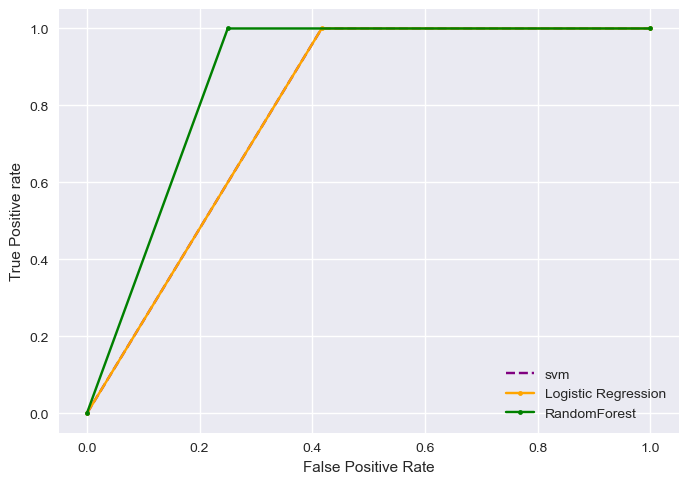

In [90]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')


# plot roc curves
plt.plot(fpr1, tpr1,  linestyle ='--',color='purple', label='svm')
plt.plot(fpr2, tpr2,  marker ='.',color='orange', label='Logistic Regression')
plt.plot(fpr3, tpr3,  marker ='.',color='green', label='RandomForest')
#plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
# title

# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
#auc_score1 = metrics.roc_auc_score(y_test, y_predict1)
#auc_score2 = metrics.roc_auc_score(y_test, y_predict2)
#auc_score3 = metrics.roc_auc_score(y_test, y_predict3)



plt.legend()
#plt.savefig('ROC',dpi=30)
plt.show();


In [91]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
import nltk

from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.preprocessing  import StandardScaler
from sklearn.metrics import confusion_matrix, matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.datasets import load_digits
digits=load_digits()
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import AdaBoostClassifier

def model_training_testing(data, label):
    classifier = svm.SVC(kernel='linear', gamma='auto', C=5)
    clf = AdaBoostClassifier(random_state=15)
    # use a classification method
    #log = LogisticRegression(max_iter=5000)
    # generate 5-fold cross-validated estimates for each input data point
    # compute predicted probability instead of label.
    return cross_val_predict(classifier,data, label, cv=5)
                            

def compute_classification_evaluation_metrics(probabilities, label):
    # determine y_true and y_predicted.
    y_true = [] # store true label of records
    y_predict1_auc = [] # store class 1 probabilities
    y_predict1_acc = [] # store predicted label
    for j in range(len(label)):
        y_true.append(label[j])
        y_predict1_auc.append(probabilities[j])  # class 1 probabilities
        y_predict1_acc.append(round(probabilities[j]))   # predicted label

    # compute confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_predict1_acc).ravel()
    print("tn, fp, fn, tp ---> ", tn, fp, fn, tp)

    # accuracy
    acc = accuracy_score(y_true, y_predict1_acc)
    print("Accuracy ---> {0}".format(acc))

    # AUC-ROC
    #roc = roc_auc_score(y_true, y_predict1_acc)
    #print("AUC-ROC ---> {0}".format(roc))

    # Matthews correlation coefficient (MCC)
    mcc = matthews_corrcoef(y_true, y_predict1_acc)
    print("MCC ---> {0}".format(mcc))

    # sensitivity, recall, hit rate, or true positive rate (TPR)
    tpr1 = tp/(tp + fn)
    print("Recall/Sensitivity ---> {0}".format(tpr1))

    # specificity, selectivity or true negative rate (TNR)
    tnr = tn/(tn + fp)
    print("Specificity ---> {0}".format(tnr))

    # precision or positive predictive value (PPV)
    ppv = tp/(tp + fp)
    print("Precision ---> {0}".format(ppv))

    # negative predictive value (NPV)
    npv = tn/(tn + fn)
    print("Negative Predictive Value ---> {0}".format(npv))

    # miss rate or false negative rate (FNR)
    fnr = 1 - tpr1
    print("False Negative Rate ---> {0}".format(fnr))

    # fall-out or false positive rate (FPR)
    fpr1 = 1- tnr
    print("False Positive Rate ---> {0}".format(fpr1))

    # false discovery rate (FDR)
    fdr = 1 - ppv
    print("False Discovery Rate ---> {0}".format(fdr))

    # false omission rate (FOR)
    fomr = 1 - npv
    print("False Omission Rate ---> {0}".format(fomr))

    # F1 score - harmonic mean of precision and recall [2*tp/(2*tp + fp + fn)]
    f1 = 2* ppv * tpr1/(ppv + tpr1)
    print("F1 Score ---> {0}".format(f1))


if __name__ == '__main__':
    """
    This program will compute several evaluation metrics that are used in classification algorithms. 
    """
    # load sklearn breast cancer data
    dataset = pd.read_csv("Seq_w1.csv")
    #X=dataset.iloc[:,1:40].values
    #y=dataset.iloc[:,-1].values
    #X = dataset.data
    #y = dataset.target     # binary label 0 and 1
   
    clf = AdaBoostClassifier(random_state=15)
    clf.fit(X_train,y_train)
    clf.score(X_train, y_train)
    #y_predict1_acc(X_test)
    # get classification results
    predicted_probs1 = model_training_testing(X, y)

    # compute classification evaluation metrics
    compute_classification_evaluation_metrics(predicted_probs1, y)


tn, fp, fn, tp --->  30 10 10 30
Accuracy ---> 0.75
MCC ---> 0.5
Recall/Sensitivity ---> 0.75
Specificity ---> 0.75
Precision ---> 0.75
Negative Predictive Value ---> 0.75
False Negative Rate ---> 0.25
False Positive Rate ---> 0.25
False Discovery Rate ---> 0.25
False Omission Rate ---> 0.25
F1 Score ---> 0.75


In [92]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
import nltk

from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.preprocessing  import StandardScaler
from sklearn.metrics import confusion_matrix, matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.datasets import load_digits
digits=load_digits()
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
def model_training_testing(data, label):
    # use a classification method
    log = LogisticRegression(max_iter=5000)
    clf = AdaBoostClassifier(random_state=10)
    # generate 5-fold cross-validated estimates for each input data point
    # compute predicted probability instead of label.
    return cross_val_predict(log, data, label, cv=5, method='predict_proba')

def compute_classification_evaluation_metrics(probabilities, label):
    # determine y_true and y_predicted.
    y_true = [] # store true label of records
    y_predict2_auc = [] # store class 1 probabilities
    y_predict2_acc = [] # store predicted label
    for j in range(len(label)):
        y_true.append(label[j])
        y_predict2_auc.append(probabilities[j][1])  # class 1 probabilities
        y_predict2_acc.append(round(probabilities[j][1]))   # predicted label

    # compute confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_predict2_acc).ravel()
    print("tn, fp, fn, tp ---> ", tn, fp, fn, tp)

    # accuracy
    acc = accuracy_score(y_true, y_predict2_acc)
    print("Accuracy ---> {0}".format(acc))

    # AUC-ROC
    #roc = roc_auc_score(y_true, y_predict2_acc)
    #print("AUC-ROC ---> {0}".format(roc))

    # Matthews correlation coefficient (MCC)
    mcc = matthews_corrcoef(y_true, y_predict2_acc)
    print("MCC ---> {0}".format(mcc))

    # sensitivity, recall, hit rate, or true positive rate (TPR)
    tpr2 = tp/(tp + fn)
    print("Recall/Sensitivity ---> {0}".format(tpr2))

    # specificity, selectivity or true negative rate (TNR)
    tnr = tn/(tn + fp)
    print("Specificity ---> {0}".format(tnr))

    # precision or positive predictive value (PPV)
    ppv = tp/(tp + fp)
    print("Precision ---> {0}".format(ppv))

    # negative predictive value (NPV)
    npv = tn/(tn + fn)
    print("Negative Predictive Value ---> {0}".format(npv))

    # miss rate or false negative rate (FNR)
    fnr = 1 - tpr2
    print("False Negative Rate ---> {0}".format(fnr))

    # fall-out or false positive rate (FPR)
    fpr2 = 1- tnr
    print("False Positive Rate ---> {0}".format(fpr2))

    # false discovery rate (FDR)
    fdr = 1 - ppv
    print("False Discovery Rate ---> {0}".format(fdr))

    # false omission rate (FOR)
    fomr = 1 - npv
    print("False Omission Rate ---> {0}".format(fomr))

    # F1 score - harmonic mean of precision and recall [2*tp/(2*tp + fp + fn)]
    f1 = 2* ppv * tpr2/(ppv + tpr2)
    print("F1 Score ---> {0}".format(f1))


if __name__ == '__main__':
    """
    This program will compute several evaluation metrics that are used in classification algorithms. 
    """
    # load sklearn breast cancer data
    dataset = pd.read_csv("Seq_w1.csv")
    #X=dataset.iloc[:,1:35].values
    #y=dataset.iloc[:,-1].values
    #X = dataset.dataset
    #y = dataset.target     # binary label 0 and 1
    clf = AdaBoostClassifier(random_state=5)
    clf.fit(X_train,y_train)
    clf.score(X_train, y_train)
    # get classification results
    
    predicted_probs2 = model_training_testing(X, y)

    # compute classification evaluation metrics
    compute_classification_evaluation_metrics(predicted_probs2, y)
    

tn, fp, fn, tp --->  28 12 11 29
Accuracy ---> 0.7125
MCC ---> 0.42513287478830203
Recall/Sensitivity ---> 0.725
Specificity ---> 0.7
Precision ---> 0.7073170731707317
Negative Predictive Value ---> 0.717948717948718
False Negative Rate ---> 0.275
False Positive Rate ---> 0.30000000000000004
False Discovery Rate ---> 0.29268292682926833
False Omission Rate ---> 0.28205128205128205
F1 Score ---> 0.7160493827160495


In [93]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
import nltk

from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.preprocessing  import StandardScaler
from sklearn.metrics import confusion_matrix, matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.datasets import load_digits
digits=load_digits()
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
def model_training_testing(data, label):
    rf = RandomForestClassifier(random_state=30,criterion="entropy",n_estimators=200, max_depth=20, n_jobs=15)
    clf = AdaBoostClassifier(random_state=30)
    # use a classification method
    #log = LogisticRegression(max_iter=5000)
    # generate 5-fold cross-validated estimates for each input data point
    # compute predicted probability instead of label.
    return cross_val_predict(rf, data, label, cv=5, method='predict_proba')

def compute_classification_evaluation_metrics(probabilities, label):
    # determine y_true and y_predicted.
    # store true label of records
    y_true = [] 
    y_predict3_auc = [] # store class 1 probabilities
    y_predict3_acc = [] # store predicted label
    for j in range(len(label)):
        y_true.append(label[j])
        y_predict3_auc.append(probabilities[j][1])  # class 1 probabilities
        y_predict3_acc.append(round(probabilities[j][1]))   # predicted label

    # compute confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_predict3_acc).ravel()
    print("tn, fp, fn, tp ---> ", tn, fp, fn, tp)

    # accuracy
    acc = accuracy_score(y_true, y_predict3_acc)
    print("Accuracy ---> {0}".format(acc))

    # AUC-ROC
    #roc = roc_auc_score(y_true, y_predict3_acc)
    #print("AUC-ROC ---> {0}".format(roc))

    # Matthews correlation coefficient (MCC)
    mcc = matthews_corrcoef(y_true, y_predict3_acc)
    print("MCC ---> {0}".format(mcc))

    # sensitivity, recall, hit rate, or true positive rate (TPR)
    tpr2 = tp/(tp + fn)
    print("Recall/Sensitivity ---> {0}".format(tpr2))

    # specificity, selectivity or true negative rate (TNR)
    tnr = tn/(tn + fp)
    print("Specificity ---> {0}".format(tnr))

    # precision or positive predictive value (PPV)
    ppv = tp/(tp + fp)
    print("Precision ---> {0}".format(ppv))

    # negative predictive value (NPV)
    npv = tn/(tn + fn)
    print("Negative Predictive Value ---> {0}".format(npv))

    # miss rate or false negative rate (FNR)
    fnr = 1 - tpr2
    print("False Negative Rate ---> {0}".format(fnr))

    # fall-out or false positive rate (FPR)
    fpr2 = 1- tnr
    print("False Positive Rate ---> {0}".format(fpr2))

    # false discovery rate (FDR)
    fdr = 1 - ppv
    print("False Discovery Rate ---> {0}".format(fdr))

    # false omission rate (FOR)
    fomr = 1 - npv
    print("False Omission Rate ---> {0}".format(fomr))

    # F1 score - harmonic mean of precision and recall [2*tp/(2*tp + fp + fn)]
    f1 = 2* ppv * tpr2/(ppv + tpr2)
    print("F1 Score ---> {0}".format(f1))


if __name__ == '__main__':
    """
    This program will compute several evaluation metrics that are used in classification algorithms. 
    """
    # load sklearn breast cancer data
    dataset = pd.read_csv("Seq_w1.csv")
    #X=dataset.iloc[:,1:45].values
    #y=dataset.iloc[:,-1].values
    #X = dataset.data
    #y = dataset.target     # binary label 0 and 1
    clf = AdaBoostClassifier(random_state=10)
    clf.fit(X_train,y_train)
    clf.score(X_train, y_train)
    # get classification results
    predicted_probs3 = model_training_testing(X, y)

    # compute classification evaluation metrics
    compute_classification_evaluation_metrics(predicted_probs3, y)
    


tn, fp, fn, tp --->  39 1 2 38
Accuracy ---> 0.9625
MCC ---> 0.9252891980686574
Recall/Sensitivity ---> 0.95
Specificity ---> 0.975
Precision ---> 0.9743589743589743
Negative Predictive Value ---> 0.9512195121951219
False Negative Rate ---> 0.050000000000000044
False Positive Rate ---> 0.025000000000000022
False Discovery Rate ---> 0.02564102564102566
False Omission Rate ---> 0.04878048780487809
F1 Score ---> 0.9620253164556962


In [98]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# logistic regression
classifier = svm.SVC(kernel='linear', gamma='auto', C=5)
classifier.fit(X_train, y_train)

log=LogisticRegression(random_state=30)
log.fit(X_train, y_train)

rf = RandomForestClassifier(random_state=30,criterion="entropy",n_estimators=200, max_depth=5, n_jobs=4)
rf.fit(X_train, y_train)


# predict probabilities
y_predict1_acc = classifier.predict(X_test)
y_predict2_acc = log.predict(X_test)
y_predict3_acc = rf.predict(X_test)


In [99]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1 = roc_curve(y_test, y_predict1_acc, pos_label=1)
fpr2 = roc_curve(y_test, y_predict2_acc, pos_label=1)
fpr3 = roc_curve(y_test, y_predict3_acc, pos_label=1)

tpr1 = roc_curve(y_test, y_predict1_acc, pos_label=1)
tpr2 = roc_curve(y_test, y_predict2_acc, pos_label=1)
tpr3 = roc_curve(y_test, y_predict3_acc, pos_label=1)

thresh1 = roc_curve(y_test, y_predict1_acc, pos_label=1)
thresh2 = roc_curve(y_test, y_predict2_acc, pos_label=1)
thresh3 = roc_curve(y_test, y_predict3_acc, pos_label=1)

fpr1, tpr1, thresh1 = roc_curve(y_test, y_predict1_acc, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, y_predict2_acc, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, y_predict3_acc, pos_label=1)



# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr1, p_tpr1, _ = roc_curve(y_test, random_probs, pos_label=1)
p_fpr2, p_tpr2, _ = roc_curve(y_test, random_probs, pos_label=1)
p_fpr3, p_tpr3, _ = roc_curve(y_test, random_probs, pos_label=1)

In [100]:
from sklearn.metrics import roc_auc_score
#def compute_classification_evaluation_metrics(probabilities, label):
 #   y_true = [] 
  #  y_predict3_auc = [] # store class 1 probabilities
   # y_predict3_acc = [] # store predicted label
    #for j in range(len(label)):
     #   y_true.append(label[j])
      #  y_predict3_auc.append(probabilities[j][1])  # class 1 probabilities
       # y_predict3_acc.append(round(probabilities[j][1]))   # predicted label

# auc scores
auc_score1 = roc_auc_score(y_test, y_predict1_acc)
auc_score2 = roc_auc_score(y_test, y_predict2_acc)
auc_score3 = roc_auc_score(y_test, y_predict3_acc)

print(auc_score1, auc_score2, auc_score3)




0.7916666666666666 0.7916666666666666 0.9166666666666667


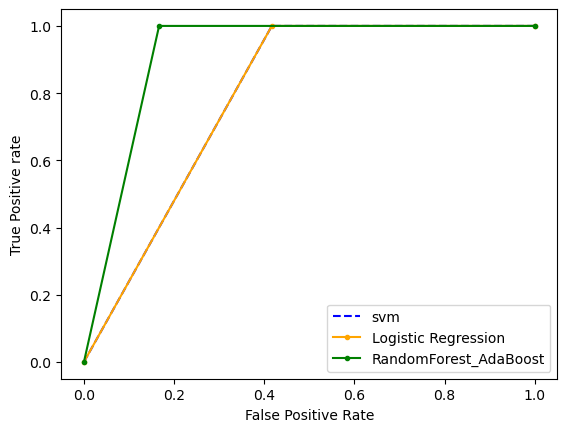

In [101]:
import matplotlib.pyplot as plt
plt.style.use('default')


# plot roc curves
plt.plot(fpr1, tpr1,  linestyle ='--',color='blue', label='svm')
plt.plot(fpr2, tpr2,  marker ='.',color='orange', label='Logistic Regression')
plt.plot(fpr3, tpr3,  marker ='.',color='green', label='RandomForest_AdaBoost')
#plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
# title

# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
#auc_score1 = metrics.roc_auc_score(y_test, y_predict1)
#auc_score2 = metrics.roc_auc_score(y_test, y_predict2)
#auc_score3 = metrics.roc_auc_score(y_test, y_predict3)



plt.legend()
#plt.savefig('ROC',dpi=300)
plt.show();
